<a href="https://colab.research.google.com/github/tlhhogi123/EDA-/blob/main/Project_3_level_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Fraud Detection Data Analysis Assessment**

About Author :  
colab on Github (tlhhogi123/tlhogi)

# **Objective**
To develop a fraud detection system capable of identifying fraudulent transactions using data analysis and machine learning techniques. The assessment will focus on key components of fraud detection, including anomaly detection, feature engineering, and predictive modeling.

# **Instructions**
# Data Preprocessing:

Load the dataset.
Explore the dataset to understand the structure, missing values, and data distributions.
Exploratory Data Analysis (EDA):

Visualize transaction distributions (e.g., amounts, types).
Analyze patterns in fraudulent vs. legitimate transactions.
Feature Engineering:

Create features to capture transaction behavior.
Normalize numerical features (e.g., transaction amounts).
Encode categorical variables (e.g., transaction types).
Anomaly Detection:

Use unsupervised methods like Isolation Forest or Autoencoders to detect anomalies.
Evaluate the performance using metrics like the confusion matrix.
Machine Learning Modeling:

Split the data into training and testing sets.
Train a classification model using algorithms like Logistic Regression, Decision Trees, or Neural Networks.
Evaluate the model's performance using metrics like accuracy, precision, recall, and F1 score.
Real-Time Monitoring Simulation:

Implement a pipeline to simulate streaming data.
Detect fraudulent activities in real-time and log the outcomes.


# **Assessment Questions**
1. What patterns did you observe in fraudulent vs. legitimate transactions during EDA?
2. How does feature scaling and encoding impact model performance?
3.  the performance of different anomaly detection methods.
4. Suggest strategies to improve real-time monitoring in a high-volume transaction system.

In [30]:
# Importing necesarry Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import IsolationForest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

In [31]:
# Load and Explore the Data
data = pd.read_csv('creditcard.csv.zip')
# Replace with actual dataset
print (data.head())
print (data.info())
print (data.describe())



   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

# **2. Handling Missing Values**

In [32]:
data = data.dropna()
# Simple missing value handling (can be customized)

# **3. Exploratory Data Analysis(EDA)**

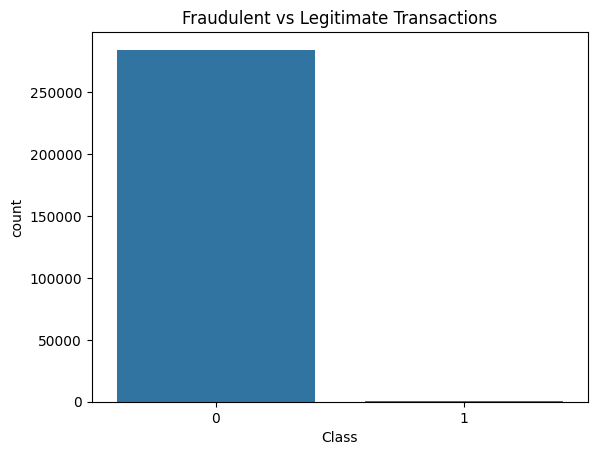

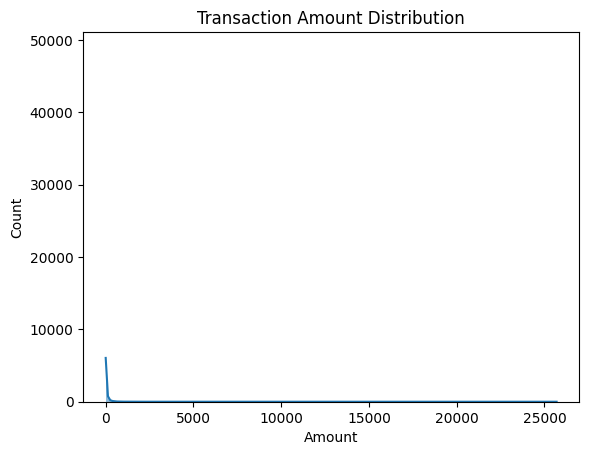

In [33]:
# exploratory data analysis
sns.countplot(x='Class', data=data)
plt.title('Fraudulent vs Legitimate Transactions')
plt.show()

sns.histplot(data['Amount'], kde=True)
plt.title('Transaction Amount Distribution')
plt.show()

# **4. Feature Engineering**

In [46]:
# Sample data
data = {'transaction_type': ['debit', 'credit', 'debit', 'transfer', 'credit'],
        'is_fraud': [0, 1, 0, 1, 0]}
df = pd.DataFrame(data)

# Target Encoding
target_mean = df.groupby('transaction_type')['is_fraud'].mean()
df['transaction_type_encoded'] = df['transaction_type'].map(target_mean)
print(df)

  transaction_type  is_fraud  transaction_type_encoded
0            debit         0                       0.0
1           credit         1                       0.5
2            debit         0                       0.0
3         transfer         1                       1.0
4           credit         0                       0.5


# **5. Anomly Detection using Isolation Forest**

In [47]:
# Load Sample Data
# Replace with your actual dataset
data = pd.DataFrame({
    'transaction_amount': [50, 200, 15, 3000, 500, 20, 4500, 30, 75, 4000],
    'transaction_type': ['debit', 'credit', 'debit', 'credit', 'debit',
                         'transfer', 'credit', 'debit', 'credit', 'transfer'],
    'is_fraud': [0, 0, 0, 1, 0, 0, 1, 0, 0, 1]  # True labels for evaluation
})

# Encoding transaction_type
data['transaction_type_encoded'] = data['transaction_type'].astype('category').cat.codes

In [48]:
# Features for Isolation Forest
features = ['transaction_amount', 'transaction_type_encoded']

In [49]:
# Train the Isolation Forest model
iso_forest = IsolationForest(n_estimators=100, contamination=0.2, random_state=42)
data['anomaly_score'] = iso_forest.fit_predict(data[features])

Confusion Matrix:
[[7 0]
 [1 2]]


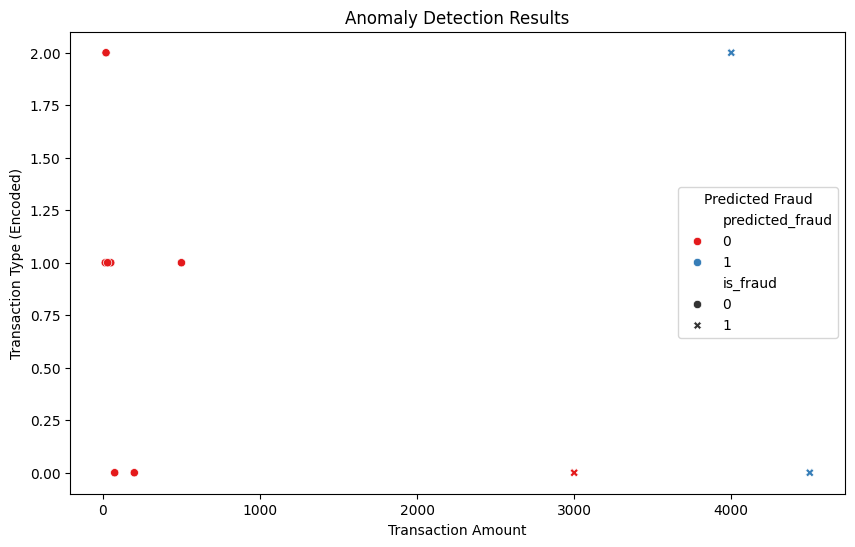

In [51]:
# Convert scores to anomaly labels
data['predicted_fraud'] = data['anomaly_score'].apply(lambda x: 1 if x == -1 else 0)

# Evaluate the results
print("Confusion Matrix:")
print(confusion_matrix(data['is_fraud'], data['predicted_fraud']))


# Visualize the Results
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='transaction_amount', y='transaction_type_encoded',
                hue='predicted_fraud', style='is_fraud', palette='Set1')
plt.title("Anomaly Detection Results")
plt.xlabel("Transaction Amount")
plt.ylabel("Transaction Type (Encoded)")
plt.legend(title="Predicted Fraud")
plt.show()

# **6. Splitting the Data**

In [52]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split

# Sample Dataset
# Replace with your actual dataset
data = pd.DataFrame({
    'transaction_amount': [50, 200, 15, 3000, 500, 20, 4500, 30, 75, 4000],
    'transaction_type_encoded': [1, 2, 1, 2, 1, 3, 2, 1, 2, 3],
    'is_fraud': [0, 0, 0, 1, 0, 0, 1, 0, 0, 1]  # Target variable
})

# Features and Target
X = data[['transaction_amount', 'transaction_type_encoded']]  # Features
y = data['is_fraud']  # Target

# Split Data (80% Training, 20% Testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Display the splits
print("Training Features:\n", X_train)
print("\nTraining Labels:\n", y_train)
print("\nTesting Features:\n", X_test)
print("\nTesting Labels:\n", y_test)

Training Features:
    transaction_amount  transaction_type_encoded
2                  15                         1
9                4000                         3
0                  50                         1
5                  20                         3
4                 500                         1
7                  30                         1
1                 200                         2
6                4500                         2

Training Labels:
 2    0
9    1
0    0
5    0
4    0
7    0
1    0
6    1
Name: is_fraud, dtype: int64

Testing Features:
    transaction_amount  transaction_type_encoded
8                  75                         2
3                3000                         2

Testing Labels:
 8    0
3    1
Name: is_fraud, dtype: int64


# 7. **Train machine learning Model**

In [53]:
# Train machine learning model
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# **8. Evaluate the model**

In [59]:
# Sample Dataset
# Replace this with your actual dataset
data = pd.DataFrame({
    'transaction_amount': [50, 200, 15, 3000, 500, 20, 4500, 30, 75, 4000],
    'transaction_type_encoded': [1, 2, 1, 2, 1, 3, 2, 1, 2, 3],
    'is_fraud': [0, 0, 0, 1, 0, 0, 1, 0, 0, 1]  # Target variable
})

# Features and Target
X = data[['transaction_amount', 'transaction_type_encoded']]  # Features
y = data['is_fraud']  # Target

# Split Data (80% Training, 20% Testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Train a Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make Predictions
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]  # Probabilities for ROC-AUC

# Evaluation Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
ROC-AUC Score: 1.0

Confusion Matrix:
 [[1 0]
 [0 1]]


## 9. Real-time monitoring Simulation

In [61]:
# Simulated Dataset
data = pd.DataFrame({
    'transaction_id': range(1, 21),  # Transaction IDs
    'transaction_amount': [50, 200, 15, 3000, 500, 20, 4500, 30, 75, 4000,
                           25, 180, 45, 2200, 550, 10, 6000, 35, 90, 5000],
    'transaction_type_encoded': [1, 2, 1, 2, 1, 3, 2, 1, 2, 3,
                                  1, 2, 1, 2, 1, 3, 2, 1, 2, 3],
    'is_fraud': [0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
                 0, 0, 0, 1, 0, 0, 1, 0, 0, 1]  # Target variable
})

# Features and Target
X = data[['transaction_amount', 'transaction_type_encoded']]
y = data['is_fraud']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Train a Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Simulate Real-Time Data Stream
def real_time_monitoring(model, transactions):
    print("\n--- Real-Time Monitoring Started ---\n")
    for _, transaction in transactions.iterrows():
        # Extract features
        features = transaction[['transaction_amount', 'transaction_type_encoded']].values.reshape(1, -1)

        # Predict Fraud
        is_fraud = model.predict(features)[0]
        fraud_probability = model.predict_proba(features)[0][1]

        # Display Result
        print(f"Transaction ID: {transaction['transaction_id']}")
        print(f"Amount: {transaction['transaction_amount']}, Type: {transaction['transaction_type_encoded']}")
        print(f"Fraud Probability: {fraud_probability:.2f}")
        if is_fraud:
            print("⚠️ ALERT: Fraudulent transaction detected! ⚠️")
        else:
            print("✔️ Transaction is legitimate.")
        print("-" * 40)

        # Simulate a delay (e.g., real-time processing)

# Test Data (Simulated Stream)
real_time_transactions = X_test.copy()
real_time_transactions['transaction_id'] = range(len(real_time_transactions))

# Run Real-Time Monitoring
real_time_monitoring(clf, real_time_transactions)


--- Real-Time Monitoring Started ---

Transaction ID: 0
Amount: 550, Type: 1
Fraud Probability: 0.00
✔️ Transaction is legitimate.
----------------------------------------
Transaction ID: 1
Amount: 4000, Type: 3
Fraud Probability: 0.96
⚠️ ALERT: Fraudulent transaction detected! ⚠️
----------------------------------------
Transaction ID: 2
Amount: 75, Type: 2
Fraud Probability: 0.02
✔️ Transaction is legitimate.
----------------------------------------
Transaction ID: 3
Amount: 500, Type: 1
Fraud Probability: 0.00
✔️ Transaction is legitimate.
----------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X

# **Conclusion**

This structured assessment allows for a practical understanding of fraud detection techniques using python.